In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


## You have been given a set of images containing text that is not clearly visible due to various reasons such as low resolution, uneven illumination, etc. Your task is to enhance the text in these images using OpenCV in Python.

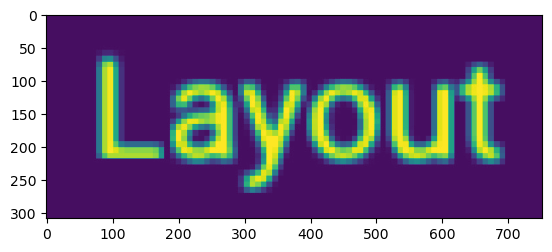

In [3]:
#Load image in grayscale 
low_resolution = cv2.imread('low_resolution.jpg')


to_gray = cv2.cvtColor(low_resolution, cv2.COLOR_BGR2GRAY)

# low_resolution = cv2.cvtColor(low_resolution)
plt.imshow(to_gray)

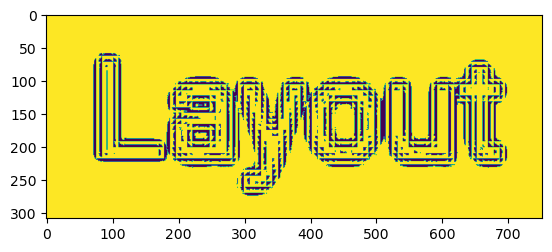

In [4]:
#  Apply a thresholding method to segment
thresh =   cv2.adaptiveThreshold(to_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11, 11)


plt.imshow(thresh)
# cv2.imwrite('text_thresh.jpg', thresh)

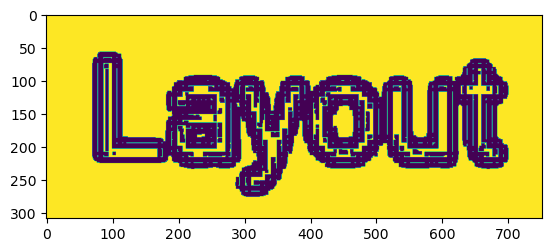

In [5]:
# erosion

kernel = np.ones((5, 5), np.uint8)

erosion = cv2.erode(thresh, kernel) 
plt.imshow(erosion)

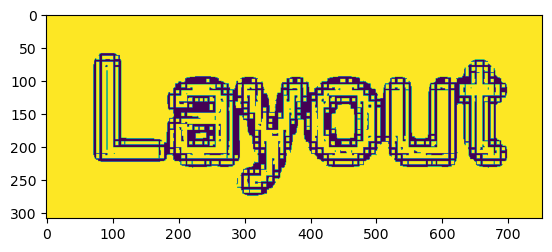

In [6]:
# dilation
dilation = cv2.dilate(erosion, kernel)

plt.imshow(dilation)

True

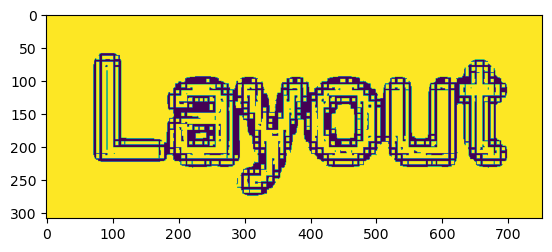

In [7]:
# opening 
opening = cv2.morphologyEx(dilation, cv2.MORPH_OPEN, kernel)

plt.imshow(opening)
cv2.imwrite('result.jpg', opening)


In [8]:
# closing 
# closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

# plt.imshow(closing)

# cv2.imwrite('result.jpg', closing)

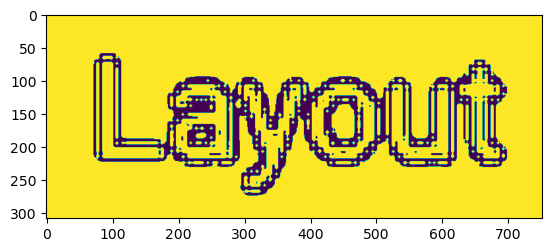

In [12]:
# Media Blur
median = cv2.medianBlur(opening,5)
plt.imshow(median)

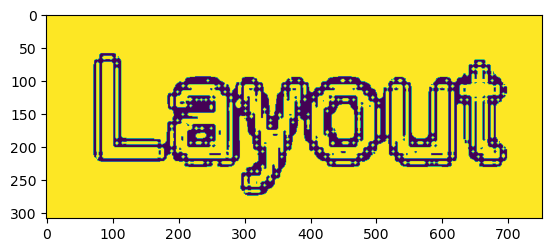

In [19]:
# Bileteral Filter
bilateral = cv2.bilateralFilter(median, 15, 75, 75)
plt.imshow(bilateral)

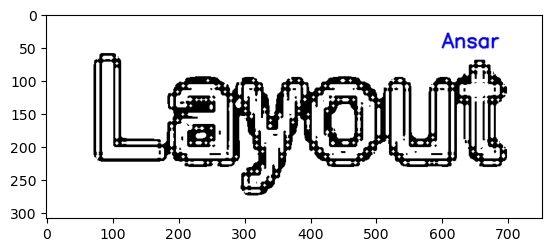

In [28]:
# Adding text to image
font = cv2.FONT_HERSHEY_SIMPLEX
org = (600, 50)
fontScale = 1
color = (0, 0, 255)
thickness = 2
img = cv2.cvtColor(bilateral, cv2.COLOR_GRAY2BGR)
image = cv2.putText(img, 'Ansar', org, font, 
                   fontScale, color, thickness, cv2.LINE_AA)
plt.imshow(image)

In [29]:
saving_image = cv2.imwrite('result.jpg', image)